# Wrangle and analyze Doggo-Data

In [ ]:
## Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import tweepy
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import datetime

## Gathering the Data

First, import tweek archive given to us by Udacity.

In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Request library to download tsv file from website
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(file_url)
with open(os.path.join(os.getcwd(), file_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
doggo_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
consumer_key = #############
consumer_secret = ############
access_token = ################
access_secret = #############

In [ ]:
# Create Connection to API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

deleted_tweets = []

with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode = 'w') as file:
    for twt_id in tweet_archive['tweet_id']:
        try:
            tweet = api.get_status(twt_id, tweet_mode = 'extended')
            file.write(json.dumps(tweet._json) + '\n')
        except:
            print('Oops! couldn\'t find the tweet!')
            deleted_tweets.append(twt_id)
       
#When loop finishes, we set up the program to let us know.        
print("Finished retrieving tweets!")
            

In [5]:
twt_id = []
faves = []
rts = []
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            twt_id.append(tweet_data['id'])
            faves.append(tweet_data['favorite_count'])
            rts.append(tweet_data['retweet_count'])
            
additional_tweet_data = pd.DataFrame({'tweet_id':twt_id, 'favorite_count':faves, 'retweet_count':rts})

## Data Assessment 

In [6]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1342,704819833553219584,NaN,NaN,2016-03-02 00:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chesterson. He's a Bolivian Scoop Dog....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,None,None,None,None
494,813187593374461952,NaN,NaN,2016-12-26 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in other ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813187593...,13,10,None,None,None,None,None
593,798925684722855936,NaN,NaN,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798925684...,11,10,Shadow,None,None,None,None
2181,668994913074286592,NaN,NaN,2015-11-24 03:29:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668994913...,5,10,None,None,None,None,None


In [9]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
print(tweet_archive[tweet_archive.tweet_id.isnull()])
print(tweet_archive[tweet_archive.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [11]:
(print)(tweet_archive[tweet_archive.rating_numerator == 0])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator 

In [12]:
print(tweet_archive.name.value_counts())

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Penny           10
Lola            10
Tucker          10
Winston          9
Bo               9
the              8
Sadie            8
Toby             7
Buddy            7
an               7
Daisy            7
Bailey           7
Stanley          6
Bella            6
Leo              6
Jax              6
Koda             6
Milo             6
Dave             6
Scout            6
Jack             6
Rusty            6
Oscar            6
Finn             5
              ... 
Kona             1
Hanz             1
Billy            1
Duddles          1
Clifford         1
Gin              1
infuriating      1
Tuck             1
Rodman           1
Bayley           1
Butters          1
Torque           1
Biden            1
Oreo             1
Alfy             1
Dutch            1
Orion            1
Jackie           1
Reptar           1
Antony           1
Saydee           1
Mike        

In [13]:
doggo_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
doggo_pred.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1825,835172783151792128,https://pbs.twimg.com/media/C5chM_jWAAQmov9.jpg,2,Border_collie,0.663138,True,collie,0.152494,True,Cardigan,0.035471,True
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,teddy,0.821615,False,toy_poodle,0.083749,True,Lakeland_terrier,0.033318,True
1411,770772759874076672,https://pbs.twimg.com/media/CrJVupHXgAA4Dkk.jpg,1,chow,0.979515,True,golden_retriever,0.010219,True,Pomeranian,0.004606,True
557,677687604918272002,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1,Pembroke,0.573047,True,sunglasses,0.126758,False,golden_retriever,0.108047,True
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1476,780496263422808064,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.997310,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True
1306,753398408988139520,https://pbs.twimg.com/ext_tw_video_thumb/75339...,1,whippet,0.163794,True,Italian_greyhound,0.157192,True,English_foxhound,0.142995,True


In [15]:
doggo_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
print(doggo_pred[doggo_pred.tweet_id.isnull()])
print(doggo_pred[doggo_pred.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []
Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []


In [17]:
additional_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
favorite_count    2341 non-null int64
retweet_count     2341 non-null int64
tweet_id          2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [18]:
additional_tweet_data.sample(7)

,favorite_count,retweet_count,tweet_id
1575,3895,1469,686618349602762752
1302,2282,672,706593038911545345
1774,7272,3899,677547928504967168
2187,907,550,668643542311546881
584,0,8690,798701998996647937
1123,4796,1793,728035342121635841
704,32461,11993,783839966405230592


In [19]:
additional_tweet_data.describe()

,favorite_count,retweet_count,tweet_id
count,2341.000000,2341.000000,2.341000e+03
mean,8027.204613,2970.398120,7.422089e+17
std,12357.261803,4976.988206,6.833609e+16
min,0.000000,0.000000,6.660209e+17
25%,1390.000000,597.000000,6.783411e+17
50%,3505.000000,1390.000000,7.186133e+17
75%,9862.000000,3468.000000,7.986979e+17
max,164839.000000,84529.000000,8.924206e+17


### Data Structure issues

-  All three dataframes need to be merged into one dataframe
- The columns labeled doggo, pupper, puppo and floofer are values and should be combined into a single column. 



### Data Quality Issues

- The columns tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and timestamp, in the tweet_archive dataframe are the wrong data type.  
are the wrong data type.
- 'tweet_id' is the wrong data type in the additional_tweet an doggo_pred dataframes. 
- Entries which are not pictures of dogs 
- Several tweets have been deleted and are missing from the api data
- Missing data from the dog breed preidictions 
- Incorrect dog names such as 'a', 'the', etc
- Only looking for original ratings 

## Cleaning Data

In [20]:
# Create copies of original dataframes. 

tweet_archive_clean = tweet_archive.copy()
additional_tweet_data_clean = additional_tweet_data.copy()
doggo_pred_clean = doggo_pred.copy()

### Data Structure Tasks

#### Define

1) merge 'doggo', 'puppo' etc columns into one. 

#### Code

In [21]:
#Create a list of our original tweet ids, with no duplicates.
tweet_ids = tweet_archive_clean.tweet_id.tolist()

#Merging the doggo, pupper, puppo, and floofer columns
tweet_archive_clean =pd.melt(tweet_archive_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                       'retweeted_status_user_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
                                       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
        var_name = 'type_toberemoved', value_name = 'type')
tweet_archive_clean = tweet_archive_clean.drop('type_toberemoved', axis =1)

In [22]:
for idx, twtid in enumerate(tweet_ids):
    dog_tweets = tweet_archive_clean[tweet_archive_clean.tweet_id == twtid]
    
    
#if a tweet has any type value(s) that is not 'None', we will, set the first one to whatever value(s) it is
# and drop the other three rows.
    if dog_tweets.type.values.tolist()[0] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[1] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[2] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[3] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
#if a tweet has type value 'None' for all four types, we will just drop the last three rows
    else: 
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)

#### Test

In [23]:
#Testing 
print(tweet_archive_clean.type.value_counts())
vc_type=tweet_archive_clean.type.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: type, dtype: int64


#### Define 

2) Merge 'additional_tweet', 'tweet_archive' and 'doggo_pred' into a singular  dataframe. 

#### Code 

In [24]:
#Merging tweet_archive & additional_tweet_data from api.

tweet_archive_clean = pd.merge(tweet_archive_clean, additional_tweet_data_clean, on = ['tweet_id'], how = 'inner')

In [25]:
#Merging again.
tweet_archive_clean = pd.merge(tweet_archive_clean, doggo_pred, on ='tweet_id', how = 'inner')

#### Test

In [26]:
#Test
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_timestamp    74 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
type                          2067 non-null object
favorite_count                2067 non-null int64
retweet_count                 2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 no

### Quality Tasks

1) We only want original ratings, so no tweet replies or retweets. 

2) In 'tweet_archive' the columns, tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and timestamp have the wrong data type 

3) There are a few tweets missing from the API data

4) Missing data for the dog breed predictions 

5) Fake or typo dog names in the 'name' column (the, an, this)

#### Define

1) We are only interested in the tweets that were official ratings of @dog_rates. Practically, this means we only want tweets that do not have a in_reply_status_id or a retweeted_statusid. We are also going to drop all associated columns. 

#### Code

In [27]:
tweet_archive_clean[~tweet_archive_clean.in_reply_to_status_id.isnull()].tweet_id.head()


122    863079547188785154
150    856526610513747968
199    844979544864018432
453    802265048156610565
826    746906459439529985
Name: tweet_id, dtype: int64

In [28]:
#dropping reply tweet
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.in_reply_to_status_id.isnull()]

#dropping retweeted tweets
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull()]

#dropping columns related to tweets that were retweeted or reply tweets
tweet_archive_clean = tweet_archive_clean.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1 )

#### Test

In [29]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2066
Data columns (total 22 columns):
tweet_id              1970 non-null int64
timestamp             1970 non-null object
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
name                  1970 non-null object
type                  1970 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null object
p3_conf               1970 non-null float

#### Define

2) Convert the tweet_id to string and timestamp to datetime. 

#### Code

In [30]:
#converting tweet_id to string
tweet_archive_clean.tweet_id = tweet_archive_clean.tweet_id.astype('str')

#converting timestamp to datetime
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

#### Test

In [31]:
tweet_archive_clean.info()
tweet_archive_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2066
Data columns (total 22 columns):
tweet_id              1970 non-null object
timestamp             1970 non-null datetime64[ns]
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
name                  1970 non-null object
type                  1970 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null object
p3_conf               1970 non-n

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
910,733460102733135873,2016-05-20 00:51:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Hermione. Her face is as old as time. ...,https://twitter.com/dog_rates/status/733460102...,11,10,Hermione,None,4448,...,1,chow,0.931275,True,beaver,0.028831,False,dhole,0.017379,False
56,880095782870896641,2017-06-28 16:09:20,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,27379,...,1,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True
1854,670037189829525505,2015-11-27 00:31:29,"<a href=""http://twitter.com/download/iphone"" r...",Awesome dog here. Not sure where it is tho. Sp...,https://twitter.com/dog_rates/status/670037189...,5,10,None,None,600,...,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False
1673,673583129559498752,2015-12-06 19:21:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. She loves her spot by the tree....,https://twitter.com/dog_rates/status/673583129...,11,10,Sandy,None,1223,...,1,Arctic_fox,0.153271,False,golden_retriever,0.113946,True,borzoi,0.110718,True
657,770655142660169732,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,7863,...,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False


#### Define

3) Handling deleted tweets  

We have already dealt with the deleted tweets, through the way of the merging of the dataframes.

#### Test 

In [32]:
# Note this will only work if you queried API, Does not work with JSON File 

for tweet in deleted_tweets:
    if str(tweet) in tweet_archive_clean:
        print("Oops! Something went wrong.")
print('Done!')

NameError: name 'deleted_tweets' is not defined

#### Define

4) Drop rows that do not have a jpg_url column since they do not contain images. 

This also solves our issues with the missing data for the doggo predictions dataframe. Tweets with no images do not have images.

#### Code

In [33]:
tweet_archive_clean=tweet_archive_clean[~tweet_archive_clean.jpg_url.isnull()]

#### Test

In [34]:
tweet_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2066
Data columns (total 22 columns):
tweet_id              1970 non-null object
timestamp             1970 non-null datetime64[ns]
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
name                  1970 non-null object
type                  1970 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null object
p3_conf               1970 non-n

#### Define

 5) Loop through names that are all lowercase or are 'None', and use a regex expression to further extract the name. If their name isn't included in the tweet, their name will be switched to 'None'.

#### Code

In [35]:
#Since we've operated quite a bit we are going to reset our dataframe indexes. Ie, 1971 rows in dataframe 
#so last index will be 1970 and first will be 0. 
tweet_archive_clean.set_index(keys = [list(range(len(tweet_archive_clean.tweet_id)))], inplace = True)

In [36]:
## looping through this enumerate function doesn't work unless we reset the indexes.
wrong_names = []
for idx, name in enumerate(tweet_archive_clean.name):
    # We only want to investigate entries that either:
    #don't have the first letter of the name capitalized, or weren't named
    if name.islower() or name == 'None':
        j = re.compile('(?:named\s|name\sis\s)(\w+)')
        if j.findall(tweet_archive_clean.loc[idx,'text']):
            tweet_archive_clean.loc[idx,'name'] = j.findall(tweet_archive_clean.loc[idx,'text'])[0]
        # if they don't match the above pattern their name will be changed to 'None'
        else:
            tweet_archive_clean.loc[idx,'name'] = 'None'

#### Test

In [37]:
tweet_archive_clean.name.value_counts()

None         593
Oliver        10
Charlie       10
Lucy          10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Daisy          7
Toby           7
Lola           7
Bella          6
Jax            6
Koda           6
Bo             6
Stanley        6
Milo           5
Zoey           5
Bailey         5
Leo            5
Louis          5
Scout          5
Oscar          5
Buddy          5
Chester        5
Dave           5
Rusty          5
Cassie         4
Reggie         4
            ... 
Herschel       1
Ricky          1
Anakin         1
Tyrus          1
Jomathan       1
Birf           1
Kial           1
Olaf           1
Alejandro      1
Rumble         1
Florence       1
Koko           1
Bonaparte      1
Spork          1
Link           1
Ebby           1
Carter         1
Lillie         1
Miguel         1
Tebow          1
Aubie          1
Marlee         1
Hero           1
Simba          1
Joey           1
Chaz           1
Cilantro       1
Laela         

## Data Reassessment 

Before doing the analysis, let's take one more look at the data.

In [38]:
tweet_archive_clean.info()
tweet_archive_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 22 columns):
tweet_id              1970 non-null object
timestamp             1970 non-null datetime64[ns]
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null int64
rating_denominator    1970 non-null int64
name                  1970 non-null object
type                  1970 non-null object
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null object
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null object
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null object
p3_conf               1970 non-n

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1605,672968025906282496,2015-12-05 02:37:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,None,1348,...,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True
1069,701214700881756160,2016-02-21 01:19:47,"<a href=""http://twitter.com/download/iphone"" r...","I'm not sure what's happening here, but it's p...",https://twitter.com/dog_rates/status/701214700...,12,10,None,None,12947,...,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
962,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,2440,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
841,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,None,None,4049,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
234,834786237630337024,2017-02-23 15:25:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Tobi. She is properly fetching her sho...,https://twitter.com/dog_rates/status/834786237...,13,10,Tobi,None,22402,...,1,Border_terrier,0.156276,True,Norwegian_elkhound,0.125912,True,Boston_bull,0.096624,True


In [39]:
for t in tweet_archive_clean[tweet_archive_clean.type =='None'].text:
    if 'doggo' in t:
        print(t)
    if 'puppo' in t:
        print(t)
    if 'pupper' in t:
        print(t)
    if 'floofer' in t:
        print(t)

This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s
Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek
Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w
This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z
Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL
This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns
Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see 

### Reassessment Quality Issues 

- The columns  p1, p1_dog, p2, p2_dog, p3, p3_dog, rating_numerator, rating_denominator are the wrong data type. 
- Still some entries that are not pictures of dogs. 
- Some missing dog types. 

#### Define

6) The variables p1, p2, and p3 need to be converted to the category data type. The variables p1_dog, p2_dog, p3_dog need to be converted to booleans and the variable rating_numerator needs to be converted to a float. 

#### Code

In [40]:
#Switch type, p1 ,p2, and p3 to category.
tweet_archive_clean.p1 = tweet_archive_clean.p1.astype('category')
tweet_archive_clean.p2 = tweet_archive_clean.p2.astype('category')
tweet_archive_clean.p3 = tweet_archive_clean.p3.astype('category')
tweet_archive_clean.type = tweet_archive_clean.type.astype('category')

#Switch p1_dog, p2_dog, and p3_dog to boolean
tweet_archive_clean.p1_dog = tweet_archive_clean.p1_dog.astype('bool')
tweet_archive_clean.p2_dog = tweet_archive_clean.p2_dog.astype('bool')
tweet_archive_clean.p3_dog = tweet_archive_clean.p3_dog.astype('bool')

#Switch rating_numerator and rating_denominator to float.
tweet_archive_clean.rating_numerator = tweet_archive_clean.rating_numerator.astype(float)
tweet_archive_clean.rating_denominator = tweet_archive_clean.rating_denominator.astype(float)

In [41]:
tweet_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1457,676582956622721024,2015-12-15 02:02:01,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,https://twitter.com/dog_rates/status/676582956...,8.0,10.0,Vinnie,None,1260,...,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
84,872486979161796608,2017-06-07 16:14:40,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12.0,10.0,None,None,40461,...,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True
768,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,doggo,164839,...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
663,757725642876129280,2016-07-25 23:54:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Beckham. He fell asleep at the wheel. ...,https://twitter.com/dog_rates/status/757725642...,11.0,10.0,Beckham,None,4842,...,2,seat_belt,0.425176,False,Labrador_retriever,0.128128,True,Siamese_cat,0.091241,False
1548,674075285688614912,2015-12-08 03:57:26,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mitch. He thinks that's a hat. No...,https://twitter.com/dog_rates/status/674075285...,11.0,10.0,Mitch,None,1009,...,1,Airedale,0.305392,True,Kerry_blue_terrier,0.250014,True,Lakeland_terrier,0.188668,True


#### Test

In [42]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 22 columns):
tweet_id              1970 non-null object
timestamp             1970 non-null datetime64[ns]
source                1970 non-null object
text                  1970 non-null object
expanded_urls         1970 non-null object
rating_numerator      1970 non-null float64
rating_denominator    1970 non-null float64
name                  1970 non-null object
type                  1970 non-null category
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
jpg_url               1970 non-null object
img_num               1970 non-null int64
p1                    1970 non-null category
p1_conf               1970 non-null float64
p1_dog                1970 non-null bool
p2                    1970 non-null category
p2_conf               1970 non-null float64
p2_dog                1970 non-null bool
p3                    1970 non-null category
p3_conf             

#### Define

7) Create a further subset of the data by using neural network predictions, tweet ratings and text. 



#### Code

In [43]:
# Use neural networkk predictions to narrow down subset of tweets that are not pictures of dogs. 


possible_not_dogs = tweet_archive_clean[(tweet_archive_clean['p1_dog'] == False) & (tweet_archive_clean['p2_dog'] == False)
                                        &(tweet_archive_clean['p3_dog'] == False) &(tweet_archive_clean['rating_numerator'] < 8 )]
not_a_dog = []

for idx, row in possible_not_dogs.iterrows():
    #Tweets with a rating of 7 are about half dog half not dog. These if statements should account for most of our lower rated dogs  
    if row['rating_numerator'] == 7:
        if 'without a dog' in row.text:
            #Fair number of tweets with dogs in them where the dog is camoflauged 
            #& @dog_rates tweets that the tweet is 'without a dog'
            continue
        else:
            #if the tweet isn't true for any of the above if statements, it's not a dog.
            not_a_dog.append(idx)
    else:
        not_a_dog.append(idx)

#dropping!
tweet_archive_clean = tweet_archive_clean.drop(labels = not_a_dog, axis = 0)

#### Test

In [44]:
# Test
tweet_archive_clean[tweet_archive_clean.rating_numerator < 8].jpg_url.sample(5)


1236    https://pbs.twimg.com/media/CYp4vFrVAAEs9AX.jpg
1406    https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg
1402    https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg
1397    https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg
1621    https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg
Name: jpg_url, dtype: object

#### Define

8) Cycle through tweets missing dog type and assign a value. 


#### Code

In [45]:
for idx, row in tweet_archive_clean[tweet_archive_clean.type =='None'].iterrows():
    dog_types = []
    if 'puppo' in row.text:
        dog_types.append('puppo')
    if 'pupper' in row.text:
        dog_types.append('pupper')
    if 'doggo' in row.text:
        dog_types.append('doggo')
    if 'floofer' in row.text:
        dog_types.append('floofer')
    if len(dog_types) > 0:
        tweet_archive_clean.loc[idx, 'type'] = ','.join(dog_types)

#### Test

In [46]:
# test
tweet_archive_clean[tweet_archive_clean.type == 'None'].sample(6)
print(tweet_archive_clean.type.value_counts())
print(vc_type)

None             1557
pupper            213
doggo              69
puppo              27
doggo,pupper        8
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: type, dtype: int64
None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: type, dtype: int64


In [47]:
# store data
tweet_archive_clean.to_csv('twitter_archive_master.csv', index = False)


#### Define

9) Fix rating numerator that have decimals.

#### Code 

In [72]:
rates = []

#raw_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))

tweet_archive_clean['text'].apply(lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))

rating = []
dog_count = []

for item in rates:
    
    # for tweets with no rating, but a picture, so a dog_count of 1
    if len(item) == 0:
        rating.append('NaN')
        dog_count.append(1)
        
    # for tweets with single rating and dog_count of 1
    elif len(item) == 1 and item[0][-1] == '10':
        rating.append(float(item[0][0]))
        dog_count.append(1)
   
    # for multiple ratings
    elif len(item) == 1: 
        a = float(item[0][0]) / (float(item[0][-1]) / 10) 
        rating.append(a)
        dog_count.append(float(item[0][-1]) / 10)
   
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        r = []
        for i in range(len(item)):
            if item[i][-1] == '10': #excluding tweet with phrase'50/50' 
                r.append(item[i])
        for rate in r:
            total = total + float(rate[0])
        a = total / len(item)
        rating.append(a)
        dog_count.append(len(item))
   
    # if any error has occurred
    else:
        rating.append('Not parsed')
        dog_count.append('Not parsed') 
        
tweet_archive_clean['rating_numerator'] = rating 
tweet_archive_clean['dog_count'] = dog_count
tweet_archive_clean['rating_numerator'].value_counts()

12.0                 448
10.0                 409
11.0                 394
13.0                 253
9.0                  151
8.0                   94
7.0                   34
14.0                  34
6.0                   16
5.0                   11
4.0                    6
3.0                    5
8.5                    3
7.5                    3
9.5                    3
5.5                    2
6.5                    2
10.5                   2
2.0                    2
9.75                   1
1776.0                 1
11.26                  1
9.666666666666666      1
4.5                    1
11.27                  1
13.5                   1
NaN                    1
420.0                  1
11.5                   1
0.0                    1
Name: rating_numerator, dtype: int64

#### Test

In [73]:
tweet_archive_clean[tweet_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_count
39,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,None,45506,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,1.0
499,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,19664,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,1.0
549,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10.0,Sophie,pupper,7064,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1.0
1358,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,pupper,1811,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,1.0


In [ ]:
tweet_archive_clean['dog_count'].value_counts()

## Analysis and Visualization 

In [74]:
tweets = tweet_archive_clean
%store tweets

Stored 'tweets' (DataFrame)


In [75]:
tweets.describe()

,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,dog_count
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1.883000e+03,1883.000000
mean,10.499734,9134.133829,2774.637281,1.210834,0.597376,1.344226e-01,6.031185e-02,1.060542
std,7.010875,13088.984610,4876.332325,0.569924,0.271366,1.005755e-01,5.110918e-02,0.703377
min,2.000000,80.000000,12.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000
25%,10.000000,2027.000000,607.500000,1.000000,0.367430,5.339800e-02,1.614795e-02,1.000000
50%,10.000000,4184.000000,1358.000000,1.000000,0.595665,1.175080e-01,4.923690e-02,1.000000
75%,10.000000,11491.000000,3168.500000,1.000000,0.848720,1.953115e-01,9.272610e-02,1.000000
max,170.000000,164839.000000,84529.000000,4.000000,1.000000,4.676780e-01,2.734190e-01,17.000000


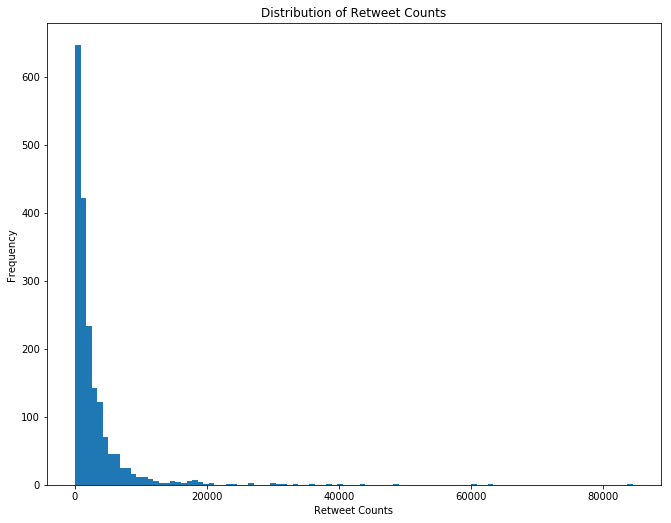

In [87]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(x = tweet_archive_clean.retweet_count, bins = 100)
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Counts')
plt.ylabel('Frequency')
plt.show()

Text(0,0.5,'Frequency')

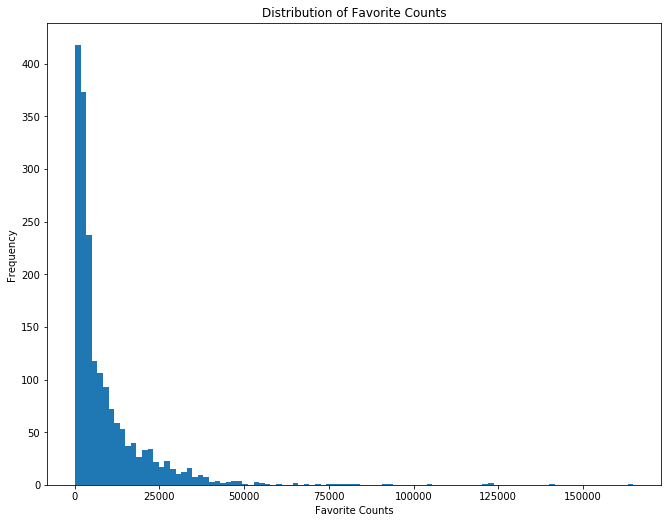

In [77]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(x = tweet_archive_clean.favorite_count, bins = 100)
plt.title('Distribution of Favorite Counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Frequency')
# plt.show()

In [79]:
# log transformation of data

to_log = ['favorite_count', 'retweet_count']
df_logged = tweet_archive_clean[to_log].applymap(lambda x: np.log10(x))
%store df_logged

Stored 'df_logged' (DataFrame)


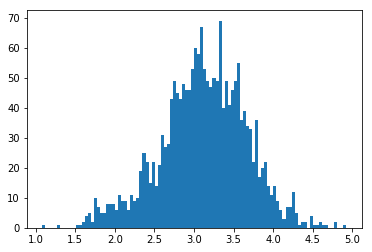

In [80]:
# Retweet Count
plt.hist(x = df_logged.retweet_count, bins = 100)
plt.show()

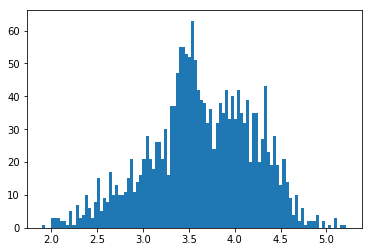

In [81]:
# Favorite Count 
plt.hist(x = df_logged.favorite_count, bins = 100)
plt.show()

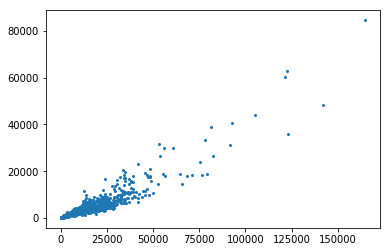

In [82]:
# Plot 

plt.plot(tweet_archive_clean.favorite_count, tweet_archive_clean.retweet_count, marker='o', linestyle='', ms=2 )
plt.show()

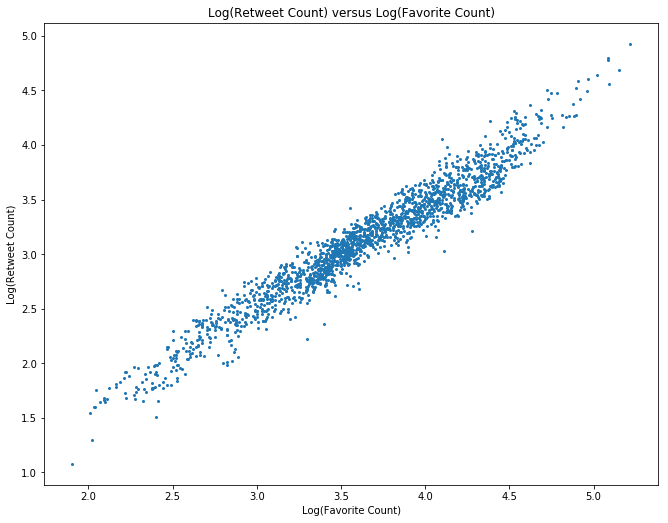

0.97068619815809598

In [83]:
# Correlation Test 
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.favorite_count, df_logged.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.show()
np.corrcoef(df_logged.retweet_count, df_logged.favorite_count)[0][1]

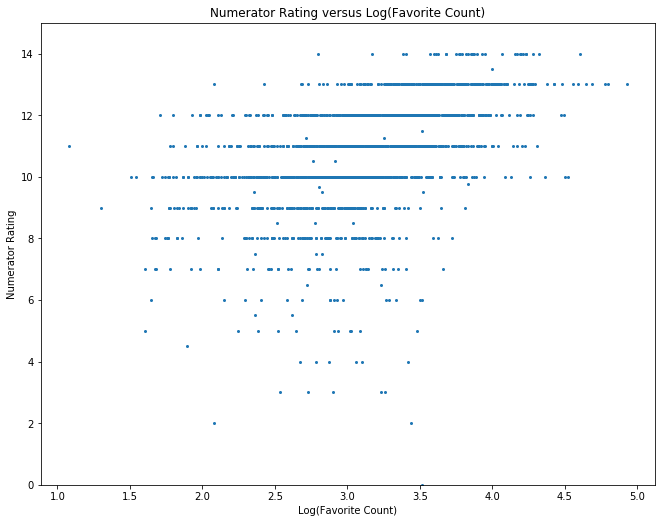

In [84]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.retweet_count, tweet_archive_clean.rating_numerator, marker ='o', linestyle='', ms= 2)
plt.title('Numerator Rating versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Numerator Rating')
plt.ylim(0,15)
plt.show()

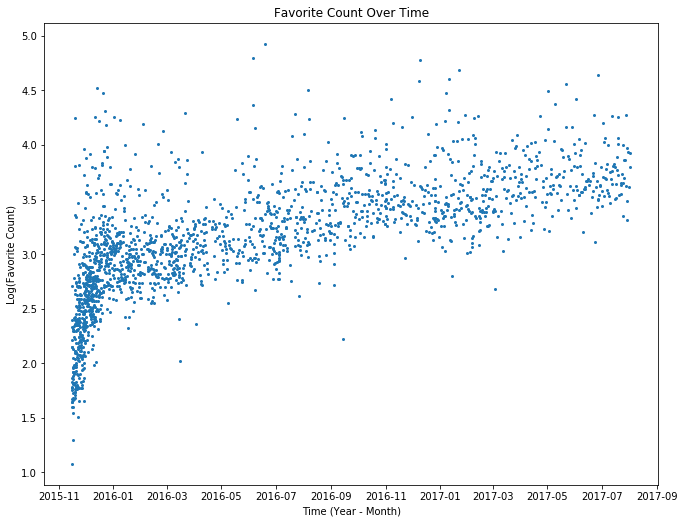

In [85]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(tweet_archive_clean.timestamp ,df_logged.retweet_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite Count Over Time')
plt.xlabel('Time (Year - Month)')
plt.ylabel('Log(Favorite Count)')
plt.show()

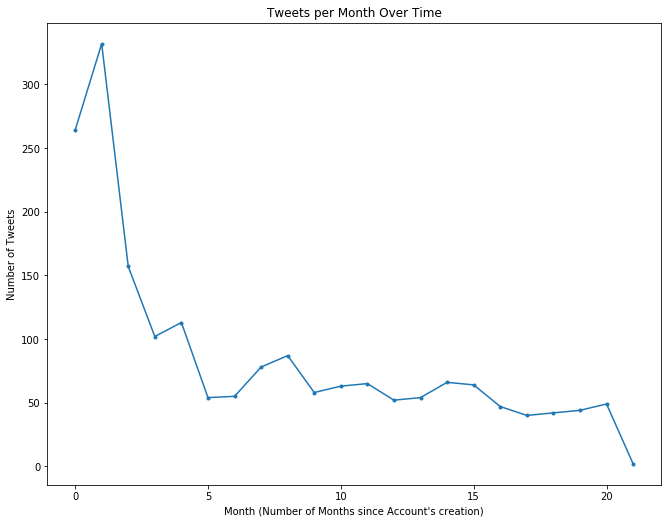

In [86]:
nmonth = list(range(22))
smonth = ['11/2015', '12/2015', '1/2016', '2/2016', '3/2016', '4/2016', ]
tweets_per_month=[264, 332, 157, 102, 113, 54, 55, 78, 87, 58, 63, 65, 52, 54, 66, 64, 47, 40, 42, 44, 49, 2]
plt.figure(1, figsize = (11, 8.5))
plt.plot(nmonth, tweets_per_month, marker= 'o', ms=3)
plt.title('Tweets per Month Over Time')
plt.xlabel('Month (Number of Months since Account\'s creation)')
plt.ylabel('Number of Tweets')
plt.show()